In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\HP\Desktop\MLProject\data\train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)

In [5]:
m,n=data.shape

In [6]:
np.random.shuffle(data)

In [7]:
data_test=data[0:1000].T

In [8]:
y_test=data_test[0]
x_test=data_test[1:n]
x_test=x_test/255

In [9]:
data_train=data[1000:m].T

In [10]:
y_train=data_train[0]
x_train=data_train[1:n]
x_train=x_train/255

In [11]:
def ReLU(z):
    return np.maximum(z,0)
    
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z,axis=0, keepdims=True)

def init_params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

def forward_prop(w1,b1,w2,b2,x):
    z1=w1.dot(x) + b1
    a1=ReLU(z1)
    z2=w2.dot(a1) + b2
    a2=softmax(z2)
    return z1,a1,z2,a2

def one_hot(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y

def derv_ReLU(z):
    return z>0

def back_prop(z1,a1,z2,a2,w2,x,y):
    m=y.size
    one_y=one_hot(y)
    dz2=a2-one_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2, axis=1, keepdims=True)
    dz1=w2.T.dot(dz2)*derv_ReLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1, axis=1, keepdims=True)
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2

def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size

def compute_loss(a2, y):
    m = y.size
    oh_Y = one_hot(y)
    # cross-entropy
    loss = -1/m * np.sum(oh_Y * np.log(a2 + 1e-8))  # add epsilon to avoid log(0)
    return loss


def gradient_descent(x,y,iterations,alpha):
    w1,b1,w2,b2=init_params()
    for i in range(iterations+1):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w2,x,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if(i%50==0):
            print("Iteration:",i)
            print("Accuracy:",get_accuracy(get_predictions(a2),y),"Loss:",compute_loss(a2,y))
    return w1,b1,w2,b2


In [12]:
w1,b1,w2,b2=gradient_descent(x_train,y_train,1000,0.1)

Iteration: 0
[4 7 3 ... 6 7 8] [8 2 9 ... 4 9 7]
Accuracy: 0.07065853658536585 Loss: 2.9494698717676635
Iteration: 50
[0 6 9 ... 3 7 7] [8 2 9 ... 4 9 7]
Accuracy: 0.37726829268292683 Loss: 1.7639112150166778
Iteration: 100
[5 2 9 ... 7 9 7] [8 2 9 ... 4 9 7]
Accuracy: 0.5466829268292683 Loss: 1.240905937786271
Iteration: 150
[8 8 4 ... 9 9 7] [8 2 9 ... 4 9 7]
Accuracy: 0.6565609756097561 Loss: 0.9757765605905013
Iteration: 200
[8 8 4 ... 9 9 7] [8 2 9 ... 4 9 7]
Accuracy: 0.7061219512195122 Loss: 0.8401231412526949
Iteration: 250
[8 8 4 ... 9 9 7] [8 2 9 ... 4 9 7]
Accuracy: 0.7376341463414634 Loss: 0.7624272805466795
Iteration: 300
[8 8 4 ... 4 4 7] [8 2 9 ... 4 9 7]
Accuracy: 0.760609756097561 Loss: 0.7053459997557715
Iteration: 350
[8 8 4 ... 4 4 7] [8 2 9 ... 4 9 7]
Accuracy: 0.7815121951219512 Loss: 0.6575870729676784
Iteration: 400
[8 8 9 ... 4 4 7] [8 2 9 ... 4 9 7]
Accuracy: 0.7996341463414635 Loss: 0.6155108892257457
Iteration: 450
[8 8 9 ... 4 4 7] [8 2 9 ... 4 9 7]
Accurac

In [24]:
def make_prediction(x,w1,b1,w2,b2):
    _, _, _, a2=forward_prop(w1,b1,w2,b2,x)
    predictions=get_predictions(a2)
    return predictions

def test_prediction(index,w1,b1,w2,b2):
    current_image=x_train[:,index,None]
    prediction=make_prediction(x_train[:,index,None],w1,b1,w2,b2)
    label=y_train[index]
    print("Prediction:",prediction)
    print("Label",label)
    current_image=current_image.reshape(28,28)*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

Prediction: [7]
Label 7


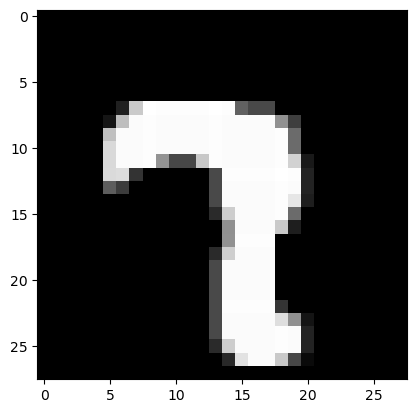

In [25]:
test_prediction(40,w1,b1,w2,b2)

In [26]:
test_predictions=make_prediction(x_test,w1,b1,w2,b2)
get_accuracy(test_predictions,y_test)

[3 1 4 4 0 3 7 2 0 8 1 1 0 4 3 6 1 4 7 6 4 2 5 3 1 2 0 9 0 0 1 0 6 9 1 7 8
 0 1 6 8 0 3 8 9 3 2 4 9 9 5 7 3 9 8 1 4 9 8 1 9 4 1 6 8 3 2 2 2 0 6 6 7 6
 1 1 6 6 3 7 9 7 0 8 5 8 3 6 8 8 6 1 9 8 6 2 4 0 2 3 0 9 3 9 4 7 4 3 6 0 9
 0 7 1 6 9 4 5 6 8 1 1 6 1 3 9 5 9 5 4 1 8 7 9 3 9 9 4 7 0 0 8 1 4 8 2 9 7
 0 9 7 6 8 6 4 0 2 4 8 3 3 8 1 0 0 2 0 3 2 9 1 0 7 1 9 8 4 0 8 1 1 3 7 9 2
 1 1 9 9 2 4 9 4 4 8 4 4 7 4 6 7 9 3 7 9 1 9 7 5 2 2 1 2 2 3 1 5 3 5 3 8 6
 9 6 1 3 1 4 2 6 6 5 0 6 6 6 9 6 7 3 7 0 1 3 5 5 2 2 8 6 3 5 3 0 0 8 1 7 5
 1 1 0 0 1 5 7 3 8 1 2 7 7 0 9 5 8 4 1 0 1 4 2 6 7 7 8 5 6 3 3 8 7 8 7 6 3
 3 0 0 3 0 1 5 8 0 2 5 9 6 3 2 1 6 8 9 5 3 9 9 3 6 2 7 3 0 2 4 3 7 5 5 4 4
 1 1 4 3 6 0 7 5 4 0 8 5 4 7 2 5 1 8 9 8 7 0 2 2 5 6 9 0 6 4 0 3 3 5 6 3 7
 7 3 6 2 8 0 0 6 6 9 1 8 2 2 0 7 2 9 6 6 7 8 9 4 7 1 4 0 0 4 0 5 5 6 9 3 0
 1 6 9 7 3 4 1 8 8 8 6 6 5 4 0 0 8 9 2 1 1 1 5 5 6 8 3 8 6 5 8 2 8 9 3 1 6
 7 9 4 6 0 2 7 8 6 6 3 6 2 6 5 2 4 5 4 2 9 1 3 1 5 2 2 7 1 3 2 0 6 8 2 4 1
 4 0 4 3 2 8 9 1 5 6 4 6 

0.885

In [27]:
x_train.shape

(784, 41000)

In [28]:
data=pd.read_csv(r"C:\Users\HP\Desktop\MLProject\data\test.csv")

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_errors_nn(x_test, y_test, w1, b1, w2, b2):
    """
    Plot percentage of incorrectly predicted labels per class for NN model.
    
    Args:
        x_test (ndarray): Test features, shape (784, m).
        y_test (ndarray): True labels, shape (m,).
        w1, b1, w2, b2: Trained neural network parameters.
    """
    # Get predictions using your NN
    y_pred = make_prediction(x_test, w1, b1, w2, b2)

    classes = np.arange(10)  # digit classes 0-9
    errors = []

    for c in classes:
        # mask for class c
        mask = (y_test == c)
        total = np.sum(mask)
        incorrect = np.sum(y_pred[mask] != y_test[mask])
        error_rate = (incorrect / total * 100) if total > 0 else 0
        errors.append(error_rate)

    errors = np.array(errors)
    overall_error = np.mean(errors)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(classes, errors, color="skyblue", edgecolor="black")
    plt.axhline(y=overall_error, color="red", linestyle="--", 
                label=f"Overall Error: {overall_error:.2f}%")
    plt.xticks(classes)
    plt.xlabel("Digit Class (0-9)")
    plt.ylabel("Error Percentage (%)")
    plt.title("Percentage of Incorrectly Predicted Labels")
    plt.legend()
    plt.show()

# Example usage after training:
# plot_class_errors_nn(x_test, y_test, w1, b1, w2, b2)
data.shape

(28000, 784)

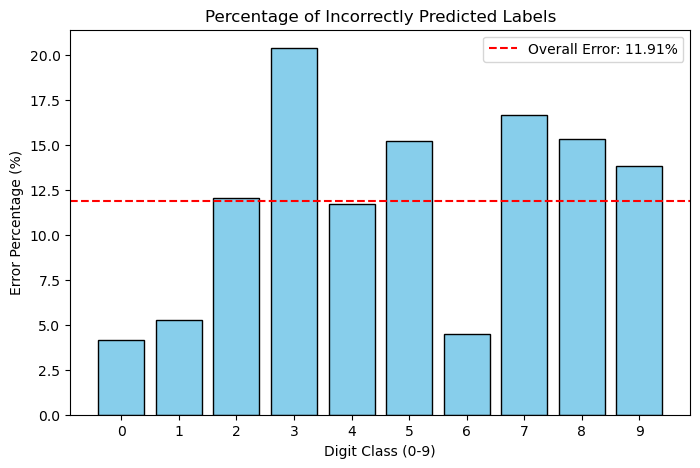

In [30]:
plot_class_errors_nn(x_test, y_test, w1, b1, w2, b2)

In [31]:
# Example: 80% train, 20% validation
val_split = int(0.8 * x_train.shape[1])
x_train_part = x_train[:, :val_split]
y_train_part = y_train[:val_split]

x_val = x_train[:, val_split:]
y_val = y_train[val_split:]
train_losses = []
val_losses = []

In [32]:
def gradient_descent_with_losses(x_train, y_train, x_val, y_val, iterations, alpha):
    """
    Perform gradient descent and track training + validation loss at every iteration.

    Args:
        x_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        x_val (ndarray): Validation features.
        y_val (ndarray): Validation labels.
        iterations (int): Number of training iterations.
        alpha (float): Learning rate.

    Returns:
        w1, b1, w2, b2: Trained parameters.
        train_losses (list): Training loss at each iteration.
        val_losses (list): Validation loss at each iteration.
    """
    w1, b1, w2, b2 = init_params()
    train_losses = []
    val_losses = []

    for i in range(iterations + 1):
        # forward + backprop on training data
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x_train)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x_train, y_train)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

        # compute training loss
        train_loss = compute_loss(a2, y_train)

        # compute validation loss
        _, _, _, a2_val = forward_prop(w1, b1, w2, b2, x_val)
        val_loss = compute_loss(a2_val, y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # (optional) print every 100 steps
        if i % 100 == 0:
            print(f"Iteration {i} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    return w1, b1, w2, b2, train_losses, val_losses


In [34]:
w1, b1, w2, b2, train_losses, val_losses = gradient_descent_with_losses(
    x_train_part, y_train_part, x_val, y_val, iterations=1000, alpha=0.1
)




Iteration 0 | Train Loss: 3.0678 | Val Loss: 2.7914
Iteration 100 | Train Loss: 1.1830 | Val Loss: 1.1690
Iteration 200 | Train Loss: 0.7481 | Val Loss: 0.7301
Iteration 300 | Train Loss: 0.6072 | Val Loss: 0.5890
Iteration 400 | Train Loss: 0.5375 | Val Loss: 0.5207
Iteration 500 | Train Loss: 0.4947 | Val Loss: 0.4794
Iteration 600 | Train Loss: 0.4650 | Val Loss: 0.4512
Iteration 700 | Train Loss: 0.4428 | Val Loss: 0.4304
Iteration 800 | Train Loss: 0.4256 | Val Loss: 0.4145
Iteration 900 | Train Loss: 0.4117 | Val Loss: 0.4017
Iteration 1000 | Train Loss: 0.4003 | Val Loss: 0.3912


In [35]:
def plot_training_validation_loss(train_losses, val_losses, step):
    """
    Plot training and validation cross-entropy loss over iterations.

    Args:
        train_losses (list): Training losses recorded during training.
        val_losses (list): Validation losses recorded during training.
        step (int): Interval of iterations at which losses were recorded.
    """
    iterations = [i * step for i in range(len(train_losses))]

    plt.figure(figsize=(8, 5))
    plt.plot(iterations, train_losses, label="Training Loss", color="blue")
    plt.plot(iterations, val_losses, label="Validation Loss", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Cross-Entropy Loss")
    plt.title("Evolution of Training and Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

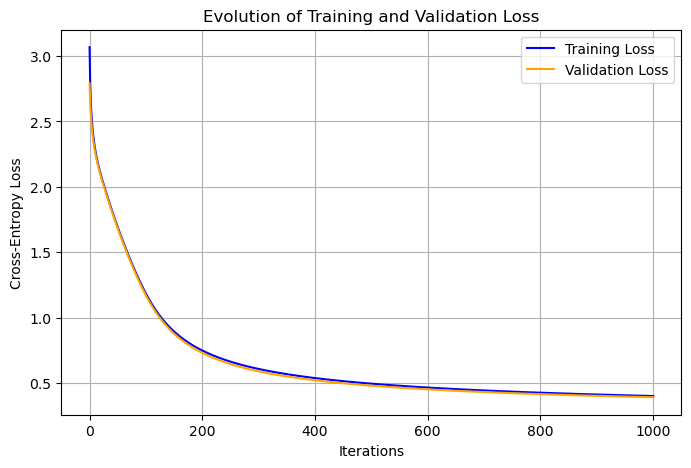

In [36]:
plot_training_validation_loss(train_losses, val_losses, 1)

In [37]:
def test_random_prediction(x_data, y_data, w1, b1, w2, b2):
    """
    Test the neural network on a random sample and display:
    - The digit image
    - A probability distribution bar chart for all classes

    Args:
        x_data (ndarray): Feature matrix (784, m)
        y_data (ndarray): True labels (m,)
        w1, b1, w2, b2: Trained neural network parameters
    """
    # Pick random index
    index = np.random.randint(0, x_data.shape[1])
    current_image = x_data[:, index, None]  # shape (784, 1)

    # Forward pass to get probabilities
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, current_image)
    probabilities = a2.ravel()  # flatten to shape (10,)
    prediction = np.argmax(probabilities)
    label = y_data[index]

    # Plot side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Show the digit image
    ax1.imshow(current_image.reshape(28, 28) * 255, cmap="gray")
    ax1.set_title(f"True Label: {label}")
    ax1.axis("off")

    # Show probability distribution
    ax2.bar(np.arange(10), probabilities, color="skyblue", edgecolor="black")
    ax2.set_xticks(np.arange(10))
    ax2.set_xlabel("Digit Class (0-9)")
    ax2.set_ylabel("Probability")
    ax2.set_title(f"Predicted Value = {prediction}")

    plt.tight_layout()
    plt.show()

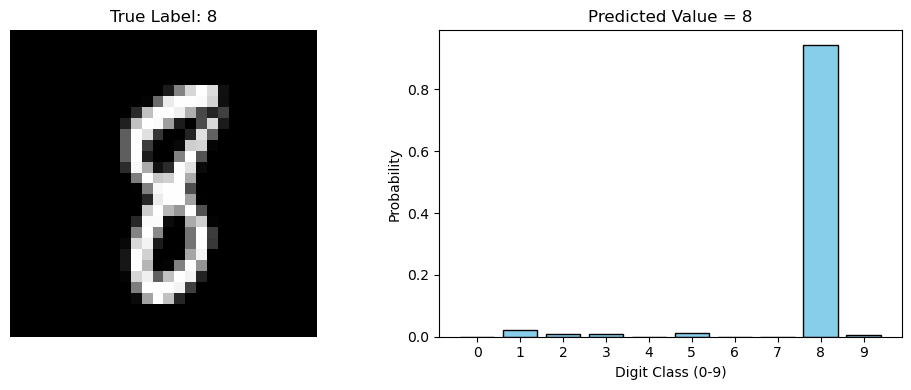

In [38]:
test_random_prediction(x_test, y_test, w1, b1, w2, b2)

In [39]:
def print_model_accuracy(x_data, y_data, w1, b1, w2, b2):
    """
    Print overall accuracy and class-wise accuracy of the model.
    No plots or graphs, only text output.
    """
    # Get predictions for all test samples
    predictions = make_prediction(x_data, w1, b1, w2, b2)

    # Overall accuracy
    overall_accuracy = get_accuracy(predictions, y_data)
    
    print(f"\n\nOverall Accuracy: {overall_accuracy:.4%}")
    

    # Class-wise accuracy
    print("Class-wise Accuracy:")
    for digit in range(10):
        indices = np.where(y_data == digit)[0]
        if len(indices) > 0:
            class_acc = np.mean(predictions[indices] == y_data[indices])
            print(f"Class {digit} accuracy: {class_acc:.4%}")
        else:
            print(f"Class {digit}: No samples available")
    print("\n\n")

In [40]:
print_model_accuracy(x_test, y_test, w1, b1, w2, b2)

[3 1 4 9 0 3 7 2 0 6 1 1 0 2 3 6 1 4 7 6 4 2 5 3 1 2 0 9 0 0 1 0 6 9 1 7 8
 0 1 6 5 0 3 8 4 3 2 4 9 9 5 7 3 9 8 1 4 9 8 1 9 4 1 6 8 3 2 2 2 0 6 6 7 6
 1 1 6 6 3 7 9 7 0 8 5 6 3 2 1 8 6 1 9 8 6 2 4 0 2 3 0 9 3 9 4 7 9 3 6 0 9
 0 9 1 6 4 4 5 6 8 1 1 6 6 3 9 5 9 5 4 1 8 7 4 3 9 9 4 7 0 0 3 1 4 8 2 9 7
 0 9 7 6 8 6 4 0 2 4 3 3 3 8 1 0 0 2 0 3 2 9 1 0 7 1 9 8 4 0 8 1 1 3 7 9 2
 1 1 9 4 2 4 9 4 4 8 4 6 7 4 4 7 9 3 7 9 1 9 7 3 2 2 1 2 2 3 1 5 3 4 3 8 6
 9 6 1 3 1 4 2 6 6 5 0 6 6 6 9 6 7 3 7 0 1 3 5 5 2 8 8 6 6 5 3 0 0 8 1 7 5
 1 1 0 0 1 5 7 8 8 1 2 7 7 0 7 8 8 4 1 0 1 4 3 6 7 7 8 5 6 3 3 8 7 8 7 6 3
 3 0 0 3 0 1 5 8 0 7 5 9 6 3 4 1 6 8 9 5 3 8 9 3 6 2 7 3 0 2 4 3 7 5 5 4 4
 1 1 4 5 6 0 7 5 4 0 1 5 9 7 2 5 1 8 9 5 7 0 2 6 5 6 9 0 6 9 0 3 3 5 6 3 7
 7 7 6 2 5 0 0 6 6 9 1 1 2 8 0 7 2 9 6 6 7 8 9 4 7 1 9 0 0 4 0 8 8 6 9 3 0
 1 6 9 7 3 4 1 8 8 8 6 6 5 4 0 0 8 9 2 1 1 1 5 5 6 8 3 8 6 5 8 2 8 9 3 2 6
 7 9 4 6 0 2 7 8 6 6 3 6 2 6 5 2 4 5 4 2 9 1 3 1 6 2 2 7 1 3 2 0 6 8 2 5 1
 4 0 4 3 2 8 9 1 5 6 4 6 